### Ridgeline plot XAS

Taken from the matplotblog ridgeplot idea from [Peter McKeever](https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/)

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

In [1]:
# getting necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

______________________________

In [3]:
#Declaring functions

In [4]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

___________________________

In [5]:
# getting the data

In [6]:
#Defining name for variables in the folder (outputs and inputs)
file=""
post=".csv"
suff="fy_"

In [7]:
#Defining variables
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [8]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

#### Calling output files

In [9]:
for ii in list_suf:
    globals()['%s' % suff+str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['%s' % suff+str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

In [10]:
# collecting just the target columns
for ii in list_suf:
    globals()['%s' % suff+str(ii)] = globals()['%s' % suff+str(ii)][['Energy','Intensity']]
    # taking an specific range of energy
    globals()['%s' % suff+str(ii)] = \
    newxrange(globals()['%s' % suff+str(ii)], 'Energy', 279, 286)

In [11]:
# Adding a new column (distance) that can distinguish one file from other in a new big pandas
for ii in list_suf:
    globals()['%s' % suff+str(ii)].insert(0, 'Distance', ii/10)

In [12]:
allxas = pd.DataFrame()

In [13]:
# Contatenating all the data
for ii in list_suf:
    allxas = pd.concat([allxas, globals()['%s' % suff+str(ii)]], axis=0)

_________________________

### Plotting XAS

In [14]:
# uncomment to check the list or parameters of the plot
#plt.rcParams.keys()

In [15]:
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 18

In [16]:
colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))

<AxesSubplot:xlabel='Energy'>

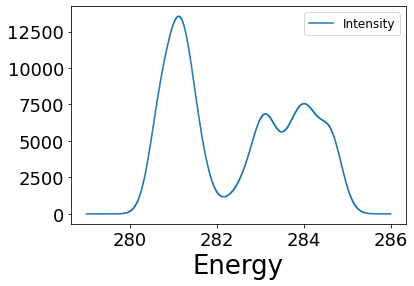

In [17]:
allxas[allxas.Distance == 8.5].plot.line(x='Energy', y='Intensity')

##### Simple example with just 3 plots

/tmp/ipykernel_2834723/2426386531.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


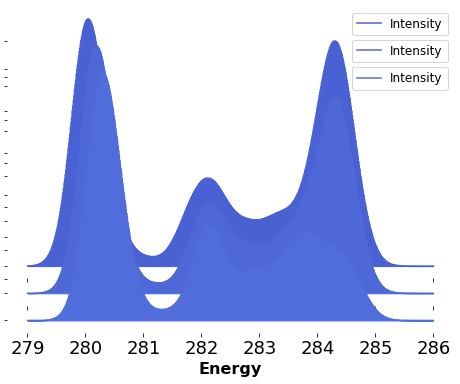

In [18]:
gs = (grid_spec.GridSpec(len(list_suf[0:3]),1))
fig = plt.figure(figsize=(8,6))

i = 0

ax_objs = []

for dist in list_suf[0:3]:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    #plot = (allxas[allxas.Distance == dist/10]
    #        .Intensity.plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
    #       )
    # plotting the XAS
    plot = (allxas[allxas.Distance == dist/10].plot.line(x='Energy', y='Intensity',\
                                                         color=colors[i], ax=ax_objs[-1])
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])

    # setting uniform x and y lims
    #ax_objs[-1].set_xlim(0, 1)
    #ax_objs[-1].set_ylim(0,2.2)
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_ylabel('')
    ax_objs[-1].set_xlabel('')

    if i == len(list_suf[0:3])-1:
        ax_objs[-1].set_xlabel("Energy", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
        
    dist_lbl = str(dist/10)#+" Å"
    adj_dists = dist_lbl.replace(" ","\n")
    #ax_objs[-1].text(-0.02,0,adj_dists,fontweight="bold",fontsize=14,ha="center")
        
    i += 1

gs.update(hspace= -0.9)
plt.tight_layout()
plt.show()

### Plotting ridgeplotline XAS

In [19]:
#### Final version

In [20]:
distances = list_suf#[0:20]
colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(distances)))

/tmp/ipykernel_2834723/1559194976.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


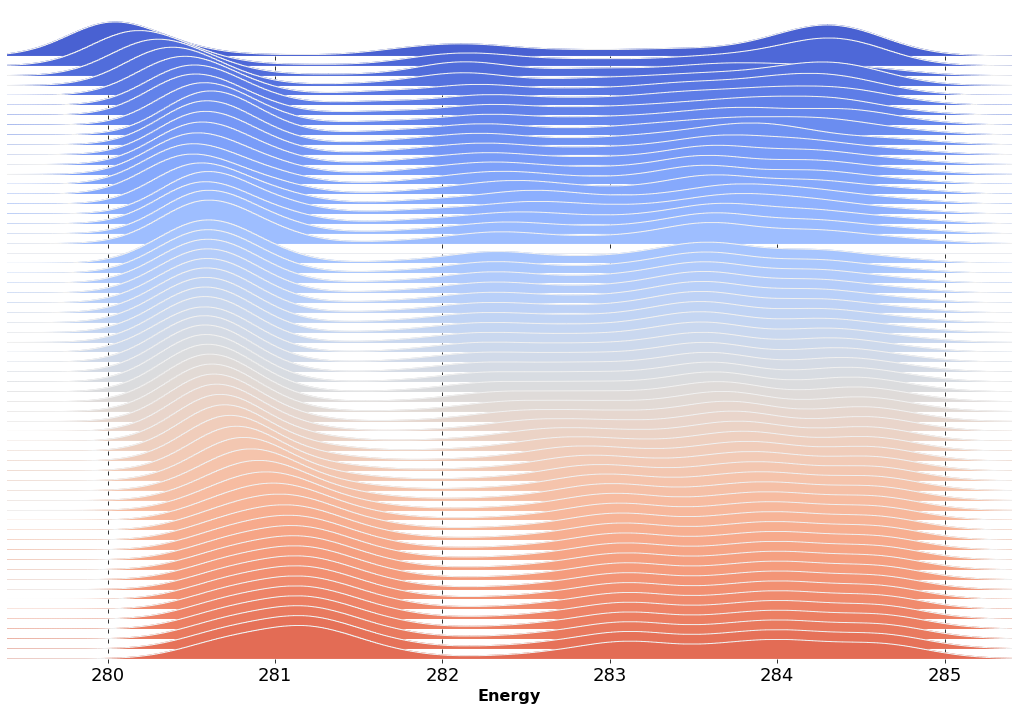

In [29]:
gs = (grid_spec.GridSpec(len(distances),1))
fig = plt.figure(figsize=(18,12))

i = 0

ax_objs = []

for dist in distances:
    
    # Energies
    x = np.array(allxas[allxas.Distance == dist/10].Energy)
    # Intensities
    y = np.array(allxas[allxas.Distance == dist/10].Intensity)
    
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the XAS
    ax_objs[-1].plot(x, y, color="#f0f0f0", lw=1)
    # filling the space beneath the curve
    ax_objs[-1].fill_between(x, y, alpha=1, color=colors[i])
    
    # setting uniform x and y lims
    ax_objs[-1].set_xlim(279.4, 285.4)
    ax_objs[-1].set_ylim(0,20000)
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set(ylabel=None) # remove the y-axis label
    ax_objs[-1].tick_params(left=False) # remove the ticks

    if i == len(distances)-1:
        ax_objs[-1].set_xlabel("Energy", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
        
    dist_lbl = str(dist/10)#+" Å"
    adj_dists = dist_lbl.replace(" ","\n")
    #ax_objs[-1].text(-0.02,0,dist_lbl,fontweight="bold",fontsize=14,ha="center")
        
    i += 1

gs.update(hspace= -0.8)
plt.tight_layout()
plt.show()

In [22]:
# there are some thing to modify